# Question 3: Build models using CBFV

**3.1 Regression**

For this problem you will be loading the `matbench_steels` dataset from the matbench benchmark datasets. (https://matbench.materialsproject.org/) To load this datasets, you will need the `matminer` package which can be installed via `pip install matminer` within your MatInformatics python virtual environment. 

a) Load the dataset and explore the distribution of yield strengths with a histogram or violin plot.

In [1]:
#For the first few code blocks I started putting all my imports here at the top
#This is typically best practice for coding in C++
#Once I got to the section where I am splitting the X and y into training and testing sets I 
#decided that when working with a Jupyter notebook, it likely makes more sense for each code block to 
#include the import commands for that block rather then move them to the top of the program.
#
#If I have time I plan on fixing this before turning in the homework

from matminer.datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [3]:
df = load_dataset("matbench_steels")


In [4]:
df.rename(columns={'composition':'formula','yield strength':'target'}, inplace=True)
print(df)

                                               formula  target
0    Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...  2411.5
1    Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....  1123.1
2    Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....  1736.3
3    Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...  2487.3
4    Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...  2249.6
..                                                 ...     ...
307  Fe0.823C0.0176Mn0.00183Si0.000198Cr0.0779Ni0.0...  1722.5
308  Fe0.823Mn0.000618Si0.00101Cr0.0561Ni0.0984Mo0....  1019.0
309  Fe0.825C0.0174Mn0.00175Si0.000201Cr0.0565Ni0.0...  1860.3
310  Fe0.858C0.0191Mn0.00194Si0.000199Cr0.0753Ni0.0...  1812.1
311  Fe0.860C0.0125Mn0.00274Si0.000198Cr0.00439Ni0....  1139.7

[312 rows x 2 columns]


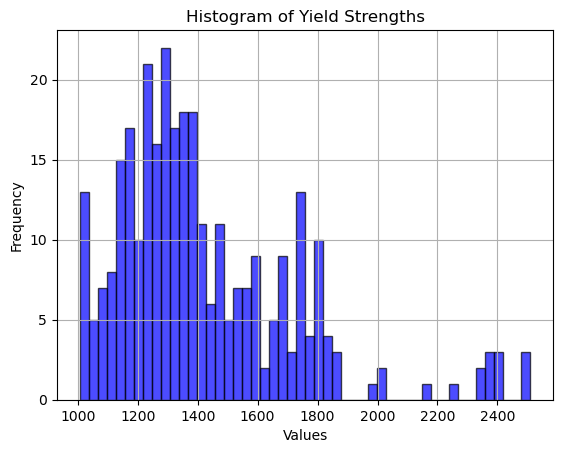

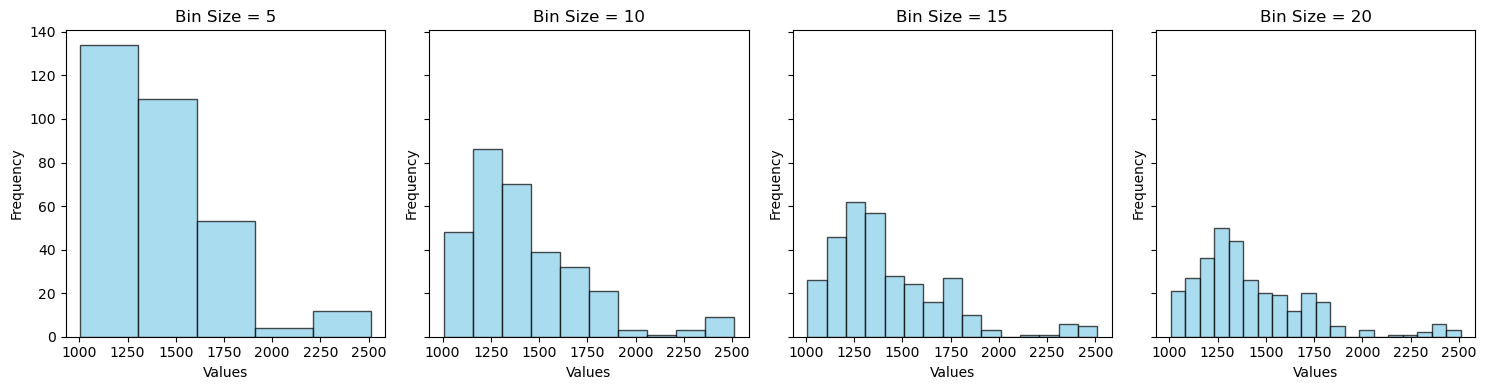

In [5]:


# Plot histogram   how many bins to use?  Lets try a few variations
df['target'].hist(bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Yield Strengths')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# Create an array of 4 subplots in a single row
fig, axes = plt.subplots(1, 4, figsize=(15, 4), sharey=True)

# Plot histograms with different bin sizes
bin_sizes = [5, 10, 15, 20]

for i, bin_size in enumerate(bin_sizes):
    ax = axes[i]
    ax.hist(df['target'], bins=bin_size, color='skyblue', edgecolor='black', alpha=0.7)
    ax.set_title(f'Bin Size = {bin_size}')
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

axes[0].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


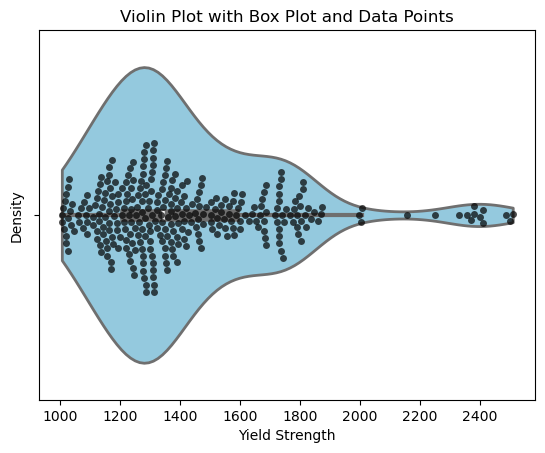

In [6]:
import seaborn as sns

#violin plot 
sns.violinplot(x='target', data=df, color='skyblue', inner='box', cut=0, scale='width', linewidth=2)

# I typically like to view the data points overlaid on the violon plot.
#prefer the swarmplot type
#sns.stripplot(x='target', data=df, color='black', jitter=0.3, size=3, alpha=0.7)
sns.swarmplot(x='target', data=df, color='black', size=5, alpha=0.7)
plt.title('Violin Plot with Box Plot and Data Points')
plt.xlabel('Yield Strength')
plt.ylabel('Density')
plt.show()

I like the violin plots better

b) Featurize the data using the `CBFV` package. Create three featurized versions of the data: one with the `mat2vec` feature set, one with `magpie`, and one with `oliynyk`. 


In [7]:
import pandas as pd
from CBFV import composition

#Initially I hard coded this as shown below.
#This is typically not best practice
#I fed this into ChatGPT3.5 and it provided a loop that I modified slightly

# X_mat2vec, y_mat2vec, formulae_mat2vec, skipped_mat2vec = composition.generate_features(df, elem_prop='mat2vec')
# X_magpie, y_magpie, formulae_magpie, skipped_magpie = composition.generate_features(df, elem_prop='magpie')
# X_oliynyk, y_oliynyk, formulae_oliynyk, skipped_oliynyk = composition.generate_features(df, elem_prop='oliynyk')

# X_sets = [X_mat2vec,X_magpie, X_oliynyk]
# y_sets = [y_mat2vec,y_magpie, y_oliynyk]
# formulae_sets = [formulae_mat2vec,formulae_magpie, formulae_oliynyk]
# skipped_sets = [skipped_mat2vec,skipped_magpie, skipped_oliynyk]

model_names = ['mat2vec', 'magpie', 'oliynyk']

X_sets = []
y_sets = []
formulae_sets = []
skipped_sets = []

for model_name in model_names:
    X, y, formulae, skipped = composition.generate_features(df, elem_prop=model_name)
    X_sets.append(X)
    y_sets.append(y)
    formulae_sets.append(formulae)
    skipped_sets.append(skipped)

# Now X_datasets, y_datasets, formulae_datasets, and skipped_datasets contain the respective datasets
#I can iterate through model_names which will have the same index numbering as the X, y, formulae, and skipped _sets
    

Processing Input Data: 100%|██████████| 312/312 [00:00<00:00, 8666.15it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 312/312 [00:00<00:00, 3763.46it/s]


	Creating Pandas Objects...


Processing Input Data: 100%|██████████| 312/312 [00:00<00:00, 19501.41it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 312/312 [00:00<00:00, 15586.27it/s]


	Creating Pandas Objects...


Processing Input Data: 100%|██████████| 312/312 [00:00<00:00, 14856.53it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 312/312 [00:00<00:00, 11143.66it/s]


	Creating Pandas Objects...


The mat2vec seems to have a potential issue
Above the first Assigning Featuers is 0%?  Is this normal or is there some strange behavior there?

c) Split the dataset into training and testing sets (80% training, 20% testing).



In [8]:
from sklearn.model_selection import train_test_split

X_train_sets=[]
X_test_sets=[]
y_train_sets=[]
y_test_sets=[]

# Split the data into training and testing sets (80% training, 20% testing)
for X,y in zip(X_sets,y_sets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)
    X_train_sets.append(X_train)
    X_test_sets.append(X_test)
    y_train_sets.append(y_train)
    y_test_sets.append(y_test)

#Now my X and y that were generated by CBFV composition for each model are split into train and test sets


d) Build linear models and compare the performance of 3 different featurization approaches. 

**don't worry if the results are bad! We will get to better models soon!** 


In [9]:
#this block enumerates through the X and y sets and performs a model fit
#The X and y train sets are used for the fit
#The X_test is enumerated to add the constant field
#The summary is printed for each, but the output is long and truncated so two of the model outputs
#are not shown unless you open the whole lot
#Issue there is using mat2vec generates a lot of parameters making scrolling cumbersome
#additional comparison done in later block

import statsmodels.api as sm
models = []
for X_train,X_test,y_train in zip(X_train_sets,X_test_sets,y_train_sets):
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    model = sm.OLS(y_train,X_train).fit()
    print(model.summary())
    models.append(model)

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     54.80
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           1.86e-18
Time:                        19:09:54   Log-Likelihood:                -1006.9
No. Observations:                 249   AIC:                             2460.
Df Residuals:                      26   BIC:                             3244.
Df Model:                         222                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
avg_0      -7.255e+05   4.44e+05     -1.635      0.1

In [10]:
#This block is to iterate through the models and pull relevant statistical data for how they performed in the training set

import pandas as pd

# Create an empty DataFrame to store model comparison results
model_comparison = pd.DataFrame(columns=["Model", "R-squared", "Adjusted R-squared", "F-statistic", "AIC","BIC"])

# Loop through the models and extract relevant statistics
for model_name, model in zip(model_names,models):
        
    # Extract R-squared
    rsquared = model.rsquared
    
    # Extract adjusted R-squared
    adj_rsquared = model.rsquared_adj
    
    # Extract F-statistic and AIC
    f_statistic = model.fvalue
    aic = model.aic
    bic = model.bic

    # Add the model statistics to the DataFrame
    model_comparison = model_comparison.append({
        "Model": model_name,
        "R-squared": rsquared,
        "Adjusted R-squared": adj_rsquared,
        "F-statistic": f_statistic,
        "AIC": aic,
        "BIC": bic
    }, ignore_index=True)

# Print the model comparison DataFrame
print(model_comparison)


     Model  R-squared  Adjusted R-squared  F-statistic          AIC  \
0  mat2vec   0.997867            0.979659    54.802265  2459.837691   
1   magpie   0.704316            0.649141    12.765030  3321.901334   
2  oliynyk   0.793892            0.730975    12.618042  3270.039740   

           BIC  
0  3244.229687  
1  3462.599450  
2  3477.569461  


In [11]:
#By all metrics, the mat2vec is a better fit.
#However, it has so many features that we may have an over fit


e) For your best model, create a residual plot and a parity plot. 

Look for systematic patterns in your residual


In [12]:
#This code block first generates the y_pred datasets for each featurized X_test set
#Then it pulls relevant metrics comparing mean absolute error, mean squared error,
#root mean squared error, and rsq for the predicted versus actual target values
#for the test set for each featurization method
#
#Then each featurization method can be compared to each other under the same conditions
#
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_sets = []
model_prediction_metrics = pd.DataFrame(columns=["MAE","MSE","RMSE","RSQ"])
# model_comparison = pd.DataFrame(columns=["Model", "R-squared", "Adjusted R-squared", "F-statistic", "AIC","BIC"])

# Predict using the model
#Iterate through each of my models and generate y_pred using that model and that model's
#X_test dataset that was split earlier
for model,X_test in zip(models,X_test_sets):
    #y_pred.append(model.predict(X_test))
    
    y_pred = model.predict(X_test)
    y_pred_sets.append(y_pred)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
    rsq = r2_score(y_test, y_pred)

    model_prediction_metrics = model_prediction_metrics.append({
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "RSQ": rsq,
        
    },ignore_index=True)

print(model_prediction_metrics)

           MAE           MSE         RMSE         RSQ
0   654.826031  1.827126e+06  1351.712430  -18.288991
1   386.349479  1.950469e+06  1396.591899  -19.591118
2  1595.036039  6.606772e+07  8128.204928 -696.477473


The MAE indicates the magpie model is better while the MSI, RMSE, and RSQ indicate mat2vec is better.
The previous metrics on model fit to the training data also suggests that mat2vec is better

However, because the RSQ is negative in all cases, it is an indication that an ols model produces a poor fit to this data set featurized with these three methods 

In [13]:
#This block is to generate a y_train_pred from the mat2vec featurized data set using the ols model
#purpose is to see side by side the parity plots of the train set versus the test set

y_train_pred = models[0].predict(X_train_sets[0]) 


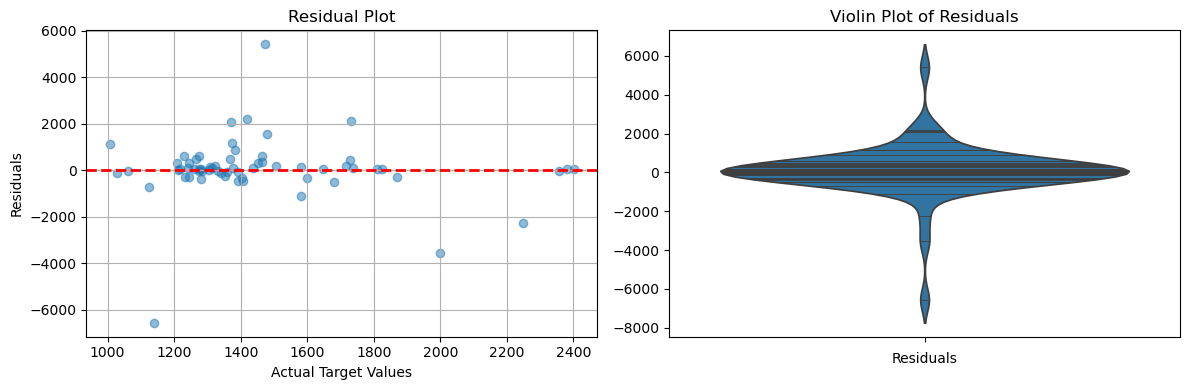

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your best model and the corresponding y_test and y_pred
# best_model = your best trained model
# y_test = actual target values
# y_pred = predicted values from the best model

y_test = y_test_sets[0]
y_pred = y_pred_sets[0]

# Calculate residuals
residuals = y_test - y_pred

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Create 1 row, 2 columns of subplots

# Plot 1: Residual scatter plot
axes[0].scatter(y_test, residuals, alpha=0.5)
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel("Actual Target Values")
axes[0].set_ylabel("Residuals")
axes[0].set_title("Residual Plot")
axes[0].grid(True)

# Plot 2: Violin plot with swarm plot overlay
sns.violinplot(data=residuals, ax=axes[1], inner="stick")
axes[1].set_xlabel("Residuals")
axes[1].set_ylabel("")
axes[1].set_title("Violin Plot of Residuals")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


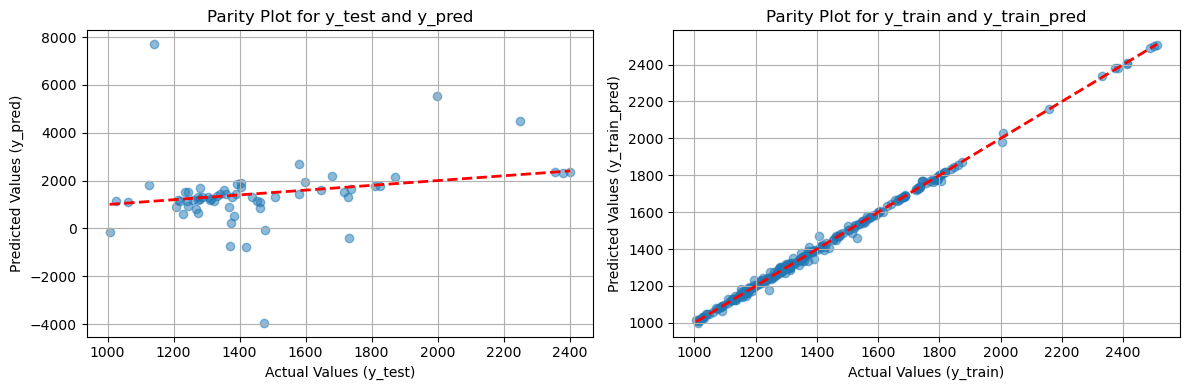

In [15]:
import matplotlib.pyplot as plt

# Assuming you have y_test, y_pred, y_train, and y_train_pred available

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Create 1 row, 2 columns of subplots

# Plot 1: Parity plot for y_test and y_pred
axes[0].scatter(y_test, y_pred, alpha=0.5)
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel("Actual Values (y_test)")
axes[0].set_ylabel("Predicted Values (y_pred)")
axes[0].set_title("Parity Plot for y_test and y_pred")
axes[0].grid(True)

# Plot 2: Parity plot for y_train and y_train_pred
axes[1].scatter(y_train, y_train_pred, alpha=0.5)
axes[1].plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel("Actual Values (y_train)")
axes[1].set_ylabel("Predicted Values (y_train_pred)")
axes[1].set_title("Parity Plot for y_train and y_train_pred")
axes[1].grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


f) Use your best model to predict the yield strength of a new steel composition Fe0.6Ni0.3Co0.2


In [16]:
#First put the formula into a df

df = pd.DataFrame(columns=["formula","target"])
df = df.append({
    "formula":"Fe0.6Ni0.3Co0.2",
    "target":1
},ignore_index=True)
df


,formula,target
0,Fe0.6Ni0.3Co0.2,1


In [17]:
# model_names[0]  #= 'mat2vec'

X, y, formulae, skipped = composition.generate_features(df, elem_prop=model_names[0])

y_pred = models[0].predict(X)

print(y_pred)

Processing Input Data: 100%|██████████| 1/1 [00:00<?, ?it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 1/1 [00:00<00:00, 994.62it/s]

	Creating Pandas Objects...
0   -148592.599215
dtype: float64


g) Now it's time to think about the model you've built and tried using! Discuss why this dataset was appropriate or not for the task given. 

**<span style="color:teal">put your discussion here</span>**
From the statistical metrics, mat2vec featurization performed better than the others.
I am unsure how well suited this dataset is to the task, but it seemed to work fine.
The issue is likely in the ols model used.

The mat2vec has so many features that it seemed to over fit
The plot of predicted Y vs actual Y for the training set is very very good.

It might be worth programatically identifying features in the model where the coefficient p-statistic is large and then not include them in the fit, but I don't believe that is the answer here



**3.2 Classification**

Now let's try a classification task! 

a) Download the `matbench_expt_is_metal` dataset, featurize with your choice of feature set, and employ a logistic regression (linear classifier). Report metrics and performance. 

In [18]:
#load the dataset into df
#rename the columns so we can use CBFV to generate featurized datasets
#convert true/false to 1/0

df = load_dataset("matbench_expt_is_metal")
df.rename(columns={'composition':'formula','is_metal':'target'}, inplace=True)
df['target']=df['target'].astype(int)
print(df)


                formula  target
0              Ag(AuS)2       1
1            Ag(W3Br7)2       1
2      Ag0.5Ge1Pb1.75S4       0
3     Ag0.5Ge1Pb1.75Se4       0
4                Ag2BBr       1
...                 ...     ...
4916             ZrTaN3       0
4917               ZrTe       1
4918             ZrTi2O       1
4919             ZrTiF6       1
4920               ZrW2       1

[4921 rows x 2 columns]


In [19]:
#Data is loaded, generate the featurized dataset
#From above:
#
#   model_names = ['mat2vec','magpie','olyinyk']
#
from CBFV import composition

X, y, formulae, skipped = composition.generate_features(df, elem_prop=model_names[2])


Processing Input Data: 100%|██████████| 4921/4921 [00:00<00:00, 15977.32it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 4921/4921 [00:00<00:00, 10104.73it/s]


	Creating Pandas Objects...


In [20]:

X.shape

(4921, 264)

In [21]:
# #Initially I used statsmodels.api as sm to perform the logistic fit and I kept getting 
# #overflow errors or maximum iterations reached warnings depending on featurization method
# #The worked example for logistic regression used statsmodels.formula.api as smf with a 
# #different way of running the logistic regression
# #
# #This is an implementation of that method

# import pandas as pd
# import statsmodels.formula.api as smf

# # Create df with all the data recombined after featurization
# # Have to manually name the target column again
# df = pd.concat([y.rename('target'), X], axis=1)

# # set the formula with all features available 
# # I am currently unsure how to exclude some features here
# formula = 'target ~ ' + ' + '.join(X.columns)

# # Fit the logistic regression model
# model = smf.logit(formula=formula, data=df).fit()

# # Print the summary of the model
# print(model.summary())


# # When this is run using 'mat2vec' featurization, I get overflow which kills my kernel
# # When using this with 'olyinyk' features, it gives an error due to invalid characters in feature names
# #   while I could remove the invalid characters I'll just use the statsmodels.api as sm approach


In [22]:
#Using Olyinyk i was able to get the logisic model to run on the 80/20 split dataset
#however, it hit max iterations
# Attempted to implement a 5 fold StratifiedKFold cross-validation to the set and now I am getting
# overflow errors on several of the folds killing my kernel
#
# Python Machine Learning Expert GPT recommended 5 possible solutions to this:
#
# One of those was to Check for High Multicollinearity using this code:

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Assuming X_train is your training dataset after adding the constant
# If X_train does not have a constant, add it first:
X_train_const = sm.add_constant(X_train)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_const.values, i) for i in range(X_train_const.shape[1])]

print(vif_data)


c:\Users\byron\miniconda3\envs\HW1_Q3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\byron\miniconda3\envs\HW1_Q3\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\byron\miniconda3\envs\HW1_Q3\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                                  Feature           VIF
0                       avg_Atomic_Number           inf
1                       avg_Atomic_Weight           inf
2                              avg_Period           inf
3                               avg_group           inf
4                            avg_families           inf
..                                    ...           ...
259         mode_heat_of_fusion_(kJ/mol)_  0.000000e+00
260   mode_heat_of_vaporization_(kJ/mol)_  2.563148e-10
261  mode_thermal_conductivity_(W/(m_K))_  2.679133e-10
262         mode_heat_atomization(kJ/mol)  0.000000e+00
263                  mode_Cohesive_energy  0.000000e+00

[264 rows x 2 columns]


The 

In [23]:
# #Many of the features have a high VIF 
# # This code will calculate VIF for all features
# # then it should remove the feature with the highest VIF
# # then it will repeat over and over until the threshold is reached
#
#
# # This code ran for ~2 hours and ended up with an error due to removing the 'const'
# # parameter due to high VIF
# # Clearly the code would need to be modified to prevent removal of the 'const' column
# # the X_reduced and removed_features were undefined
# #
# # Per Discord chat with Andrew, I will not pursue this for this homework, but will accept
# # a model that hits the maximum iterations

# tgt_thresh = 5.0

# import pandas as pd
# import numpy as np
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant

# def calculate_vif(X, thresh=tgt_thresh):
#     '''
#     Calculates VIF for each feature in a dataset and removes features with VIF > threshold until all features have VIF <= threshold
    
#     Parameters:
#     X (pd.DataFrame): DataFrame containing features
#     thresh (float): VIF threshold above which features will be removed
    
#     Returns:
#     pd.DataFrame: DataFrame with reduced features based on VIF threshold
#     '''
#     # Add a constant for intercept
#     X_const = add_constant(X)
    
#     # Initialize variables
#     cols = X_const.columns
#     high_vif_cols = []

#     while True:
#         # Calculate VIF
#         vif_df = pd.DataFrame([variance_inflation_factor(X_const.values, i) 
#                               for i in range(X_const.shape[1])], 
#                               index=cols,
#                               columns=['VIF'])
        
#         # Find the maximum VIF
#         max_vif = vif_df['VIF'].max()
        
#         # Check if the maximum VIF is above the threshold
#         if max_vif > thresh:
#             # Identify the feature with the highest VIF
#             feature_with_max_vif = vif_df['VIF'].idxmax()
#             print(f"Removing {feature_with_max_vif} with VIF={max_vif}")
            
#             # Remove the feature with the highest VIF
#             X_const = X_const.drop(columns=[feature_with_max_vif])
#             cols = X_const.columns
#             high_vif_cols.append(feature_with_max_vif)
#         else:
#             break
    
#     print("Final features after VIF selection:", list(X_const.columns))
#     return X_const.drop(columns=['const']), high_vif_cols

# # Assuming X is your dataset of features
# X_reduced, removed_features = calculate_vif(X, thresh=tgt_thresh)

# # Now, X_reduced contains the features with VIF <= 5.0

1900 - commended out below due to kernal death


In [24]:
# #
# import statsmodels.api as sm
# from sklearn.model_selection import StratifiedKFold
# import numpy as np

# # Assuming X and y are already defined
# from sklearn.model_selection import train_test_split

# # Splitting the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)

# # Initialize StratifiedKFold
# n_splits = 5  # Define the number of folds
# cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# # Prepare an array to store results for each fold
# results = []

# for train_idx, val_idx in cv.split(X_train, y_train):
#     # Split the data into training and validation sets
#     X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
#     y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
#     # Add a constant to the features for the intercept term
#     X_train_fold_const = sm.add_constant(X_train_fold)
#     X_val_fold_const = sm.add_constant(X_val_fold)
    
#     # Fit the model
#     model = sm.Logit(y_train_fold, X_train_fold_const).fit(disp=0)  # disp=0 suppresses the fit output
    
#     # Evaluate the model (e.g., using accuracy, AUC, or another metric on the validation set)
#     # Here, we use the model's log-likelihood as an example metric
#     log_likelihood = model.llf
#     results.append(log_likelihood)

#     # You can also make predictions on the validation set and evaluate them
#     # predictions = model.predict(X_val_fold_const)
#     # Evaluate predictions...

# # Average the results from all folds for an overall metric
# average_log_likelihood = np.mean(results)
# print(f"Average Log-Likelihood: {average_log_likelihood}")


In [25]:
# df = load_dataset("matbench_expt_is_metal")
# df.rename(columns={'composition':'formula','is_metal':'target'}, inplace=True)
# df['target']=df['target'].astype(int)
# X, y, formulae, skipped = composition.generate_features(df, elem_prop='olyinyk')
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)
# X_train = sm.add_constant(X_train)
# X_test = sm.add_constant(X_test)
# model = sm.Logit(y_train,X_train).fit()
# print(model.summary())

In [26]:
# import statsmodels.api as sm
# from sklearn.model_selection import train_test_split  # Import train_test_split from scikit-learn


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)

# X_train = sm.add_constant(X_train)
# X_test = sm.add_constant(X_test)
# # model = sm.Logit(y_train,X_train).fit()
# # print(model.summary())


In [27]:
# #ChatGPT4 recommended increasing the number of iterations to see if it converges
# #I believe another tactic is likely to be needed as neither magpie or mat2vec 
# #had any better success and threw overflow type errors killing my kernel

#the code below ended up throwing the overflow error again
#Clearly something else is needed to get a Logistic fit on this data featurized as it is

# import statsmodels.api as sm
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)

# # Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Add a constant to the scaled features
# X_train_scaled = sm.add_constant(X_train_scaled)
# X_test_scaled = sm.add_constant(X_test_scaled)

# # Fit the logistic regression model
# model = sm.Logit(y_train, X_train_scaled).fit(maxiter=100)  # Increase maxiter if needed
# print(model.summary())


In [28]:
# #When I advised chatGpt 4 that i now get the overflow error again it recommended regularization
# #Here is the code provided:
#This was initially run using the olyinyk featurization but it still went over iteration limits
#However, because the l1 regularization serves to force many of the parameters to zero
#thereby removing many less relevant features I thought it may be interesting to apply 
#to the mat2vec featurization which produces a very large number of parameters

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant to the scaled features
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

# Fit the logistic regression model with L1 regularization
# model = sm.Logit(y_train, X_train_scaled).fit_regularized(method='l1')
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     12.62
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           4.49e-41
Time:                        19:10:04   Log-Likelihood:                -1576.0
No. Observations:                 249   AIC:                             3270.
Df Residuals:                     190   BIC:                             3478.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

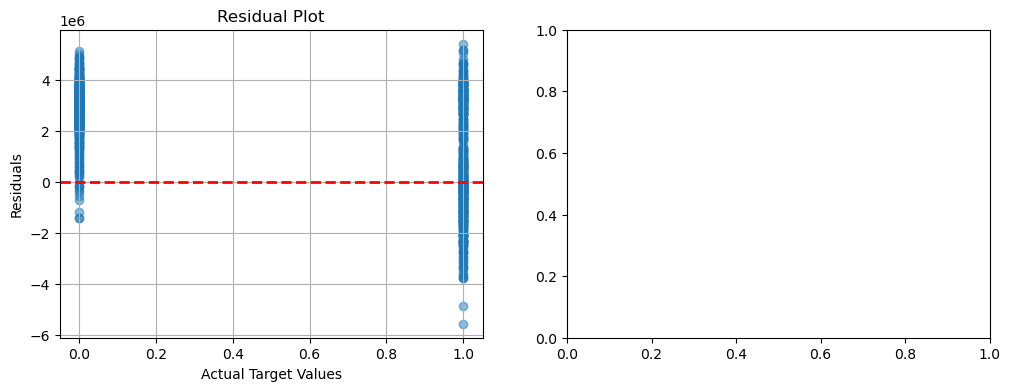

In [29]:
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Create 1 row, 2 columns of subplots

# Plot 1: Residual scatter plot
axes[0].scatter(y_test, residuals, alpha=0.5)
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel("Actual Target Values")
axes[0].set_ylabel("Residuals")
axes[0].set_title("Residual Plot")
axes[0].grid(True)

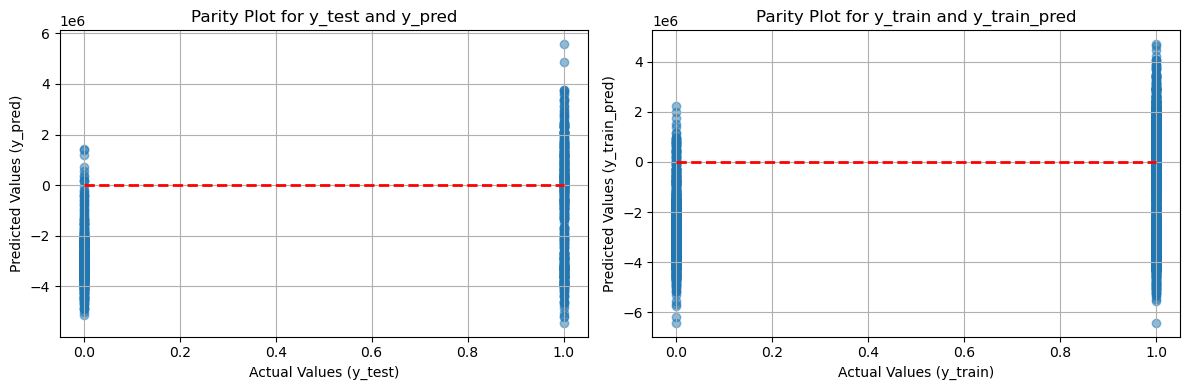

In [30]:
import matplotlib.pyplot as plt
y_train_pred = model.predict(X_train)
# Assuming you have y_test, y_pred, y_train, and y_train_pred available

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Create 1 row, 2 columns of subplots

# Plot 1: Parity plot for y_test and y_pred
axes[0].scatter(y_test, y_pred, alpha=0.5)
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel("Actual Values (y_test)")
axes[0].set_ylabel("Predicted Values (y_pred)")
axes[0].set_title("Parity Plot for y_test and y_pred")
axes[0].grid(True)

# Plot 2: Parity plot for y_train and y_train_pred
axes[1].scatter(y_train, y_train_pred, alpha=0.5)
axes[1].plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel("Actual Values (y_train)")
axes[1].set_ylabel("Predicted Values (y_train_pred)")
axes[1].set_title("Parity Plot for y_train and y_train_pred")
axes[1].grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()
